## 데이터 가공 코드
- Technical
- Volume
- Fundamental

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 10.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model

# DataFrame 불러오기
df = pd.read_excel("Technical.xlsx", header=[0, 1, 2, 3])  # 4단계 멀티 헤더

In [ ]:
# 종가, 거래량 열만 필터링
target_items = ['종가(원)', '거래량(주)']
filtered_cols = [col for col in df.columns if col[-1] in target_items]

In [ ]:
df_filtered = df[filtered_cols].copy()

In [ ]:
df_filtered

A005930               A000660               A207940             \
           삼성전자                SK하이닉스              삼성바이오로직스              
     S41000060F S41000080F S41000060F S41000080F S41000060F S41000080F   
          종가(원)     거래량(주)      종가(원)     거래량(주)      종가(원)     거래량(주)   
0         38700    9900267      60500    1647462     386500     256133   
1         38750    7847664      60600    1934295     374000     148344   
2         37600   12471493      57700    3337621     376500     130752   
3         37450   14108958      58300    3388087     381000     118098   
4         38750   12748997      58700    2273750     388000     110373   
...         ...        ...        ...        ...        ...        ...   
1689      58000   16551694     259500    3398736     992000      70626   
1690      60500   23737899     278500    5436312    1004000      71516   
1691      61300   23933612     286000    5466598    1004000      57537   
1692      60200   19402300     293000    5894020     999000      55487   
1693      60800   17340470     284000    5134863     996000      38057   

        A373220               A012450             ...    A005420             \
       LG에너지솔루션             한화에어로스페이스             ...      코스모화학              
     S41000060F S41000080F S41000060F S41000080F  ... S41000060F S41000080F   
          종가(원)     거래량(주)      종가(원)     거래량(주)  ...      종가(원)     거래량(주)   
0           NaN        NaN      32500     168609  ...      12100     133705   
1           NaN        NaN      32950     140721  ...      11800     180057   
2           NaN        NaN      33950     633226  ...      11400     164826   
3           NaN        NaN      35050     583826  ...      11600     164002   
4           NaN        NaN      34250     459892  ...      12350     394778   
...         ...        ...        ...        ...  ...        ...        ...   
1689   294000.0   193331.0     919000     243428  ...      15010     308796   
1690   300500.0   275626.0     895000     281041  ...      15930     349623   
1691   298000.0   185031.0     856000     313167  ...      15690     127816   
1692   297000.0   162439.0     878000     322082  ...      15620     114867   
1693   288000.0   219699.0     890000     334673  ...      14770     165568   

        A006650               A093370               A456040             \
           대한유화                    후성                   OCI              
     S41000060F S41000080F S41000060F S41000080F S41000060F S41000080F   
          종가(원)     거래량(주)      종가(원)     거래량(주)      종가(원)     거래량(주)   
0        153500      36765       7420     532781        NaN        NaN   
1        147500      43164       7090     803435        NaN        NaN   
2        139500      71169       6740    1246706        NaN        NaN   
3        136000      66700       6540    1616277        NaN        NaN   
4        148000     101700       7010    1402291        NaN        NaN   
...         ...        ...        ...        ...        ...        ...   
1689      80800      43781       5000     496340    54700.0    39589.0   
1690      86800      52298       5060     438241    56800.0    53362.0   
1691      86500      16362       5040     375471    57500.0    55935.0   
1692      86300      21982       4955     375581    56900.0    40275.0   
1693      83000      20727       4775     378747    56300.0    64475.0   

        A002710             
          TCC스틸             
     S41000060F S41000080F  
          종가(원)     거래량(주)  
0          2000      16893  
1          1990      25236  
2          1980       7472  
3          1935      23580  
4          1945       4647  
...         ...        ...  
1689      15690     154164  
1690      17160     295456  
1691      16900     119125  
1692      17030     127016  
1693      16140     140575  

[1694 rows x 400 columns]

In [ ]:
df_filtered.columns = [f"{col[0]}_{col[-1].replace('(원)','').replace('(주)','')}" for col in df_filtered.columns]
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')
df_filtered.index = pd.to_datetime(df_filtered.index)

In [ ]:
print(df_filtered)

                               A005930_종가  A005930_거래량  A000660_종가  \
1970-01-01 00:00:00.000000000       38700      9900267       60500   
1970-01-01 00:00:00.000000001       38750      7847664       60600   
1970-01-01 00:00:00.000000002       37600     12471493       57700   
1970-01-01 00:00:00.000000003       37450     14108958       58300   
1970-01-01 00:00:00.000000004       38750     12748997       58700   
...                                   ...          ...         ...   
1970-01-01 00:00:00.000001689       58000     16551694      259500   
1970-01-01 00:00:00.000001690       60500     23737899      278500   
1970-01-01 00:00:00.000001691       61300     23933612      286000   
1970-01-01 00:00:00.000001692       60200     19402300      293000   
1970-01-01 00:00:00.000001693       60800     17340470      284000   

                               A000660_거래량  A207940_종가  A207940_거래량  \
1970-01-01 00:00:00.000000000      1647462      386500       256133   
1970-01-01 00:00:

In [ ]:
import pandas as pd

# 기준 날짜 생성
date_range = pd.date_range(start='2019-01-01', end='2025-06-27', freq='B')  # B = business day

print(f"거래일 수: {len(date_range)}")  # → 1694여야 함

거래일 수: 1694


In [ ]:
# 위에서 만든 date_range로 인덱스 덮어쓰기
df_filtered.index = date_range

# 확인
print(df_filtered.index[:5])

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')


In [ ]:
print(df_filtered)

            A005930_종가  A005930_거래량  A000660_종가  A000660_거래량  A207940_종가  \
2019-01-01       38700      9900267       60500      1647462      386500   
2019-01-02       38750      7847664       60600      1934295      374000   
2019-01-03       37600     12471493       57700      3337621      376500   
2019-01-04       37450     14108958       58300      3388087      381000   
2019-01-07       38750     12748997       58700      2273750      388000   
...                ...          ...         ...          ...         ...   
2025-06-23       58000     16551694      259500      3398736      992000   
2025-06-24       60500     23737899      278500      5436312     1004000   
2025-06-25       61300     23933612      286000      5466598     1004000   
2025-06-26       60200     19402300      293000      5894020      999000   
2025-06-27       60800     17340470      284000      5134863      996000   

            A207940_거래량  A373220_종가  A373220_거래량  A012450_종가  A012450_거래량  \
2019-01-01

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=602c787985a684733c1cda180ba44b3b73024a0f3330dfdf17755f28c9b48316
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator, WilliamsRIndicator
from ta.trend import MACD
from arch import arch_model

# 종가와 거래량 컬럼 분리
price_columns = [col for col in df_filtered.columns if '_종가' in col]
volume_columns = [col for col in df_filtered.columns if '_거래량' in col]

# 결과 저장용
features = pd.DataFrame(index=df_filtered.index)

for col in price_columns:
    code = col.replace('_종가', '')
    price = df_filtered[col]
    volume = df_filtered[f'{code}_거래량']
    log_ret = np.log(price).diff()

    # 1. 수익률 (단순 모멘텀)
    for d in [5, 10, 20, 60]:
        features[f'{code}_ret_{d}d'] = price.pct_change(d)

    # 2. 이격도
    for d in [5, 10, 20, 60]:
        features[f'{code}_disparity_{d}d'] = price / price.rolling(d).mean() - 1

    # 3. MACD (디폴트: 12,26,9)
    macd = MACD(close=price, window_slow=26, window_fast=12, window_sign=9)
    features[f'{code}_macd'] = macd.macd_diff()

    # 4. RSI
    rsi = RSIIndicator(close=price, window=14)
    features[f'{code}_rsi'] = rsi.rsi()

    # 5. Williams %R
    willr = WilliamsRIndicator(high=price, low=price, close=price, lbp=14)
    features[f'{code}_willr'] = willr.williams_r()

    # 6. Historical volatility (log return std * sqrt(252))
    features[f'{code}_hist_vol'] = log_ret.rolling(20).std() * np.sqrt(252)

    # 7. GARCH(1,1) Volatility 예측 (마지막 시점만)
    try:
        returns = 100 * log_ret.dropna()[-100:]  # 최근 100일
        if len(returns) >= 50:
            model = arch_model(returns, vol='Garch', p=1, q=1)
            res = model.fit(disp='off')
            forecast = res.forecast(horizon=1)
            features[f'{code}_garch_vol'] = np.nan
            features.loc[forecast.variance.index[-1], f'{code}_garch_vol'] = np.sqrt(forecast.variance.values[-1][0]) / 100
    except Exception as e:
        print(f'{code} GARCH 계산 오류: {e}')
        features[f'{code}_garch_vol'] = np.nan

    # 8. 거래량 이동평균 비율 (20일 평균)
    features[f'{code}_volume_ma_ratio'] = volume / volume.rolling(20).mean()

    # 9. 거래량 급증 비율 (5일 평균)
    features[f'{code}_volume_spike_ratio'] = volume / volume.rolling(5).mean()

# 결과 저장
# features.to_csv("technical_indicators_kospi200.csv")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/tmp/ipython-input-40-2345704483.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'{code}_disparity_{d}d'] = price / price.rolling(d).mean() - 1
/tmp/ipython-input-40-2345704483.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'{code}_disparity_{d}d'] = price / price.rolling(d).mean() - 1
/tmp/ipython-input-40-2345704483.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [ ]:
features.to_csv("technical_indicators_kospi200.csv")

거래량 팩터

In [ ]:
import pandas as pd
import numpy as np

# 1. 볼륨 파일 불러오기
raw_df = pd.read_excel("volume.xlsx", header=None)

# 2. 헤더 구성 (3행: Symbol, Symbol Name, Item Name)
columns = raw_df.iloc[0:3].T  # 전치
columns = columns.fillna(method='ffill')  # 결측 보간

# 3. 컬럼명 생성: Symbol_SymbolName_ItemName
columns = (
    columns[0].astype(str).str.strip() + "_" +  # Symbol
    columns[1].astype(str).str.strip() + "_" +  # Symbol Name
    columns[2].astype(str).str.strip()          # Item Name
)

# 4. 불필요한 괄호 및 공백 제거
columns = columns.str.replace(r"\(.*?\)", "", regex=True).str.replace(" ", "")

# 5. 실제 데이터만 추출 (4행부터)
df_volume = raw_df.iloc[3:].copy()
df_volume.columns = columns.values  # 전체 헤더 적용

# 6. 인덱스: 첫 번째 열 (날짜) 처리
df_volume.index = pd.to_datetime(df_volume.iloc[:, 0])
df_volume = df_volume.drop(df_volume.columns[0], axis=1)  # 날짜 열 제거

In [ ]:
technical

,A005930_수익률 (1주)(%),A005930_수익률 (1개월)(%),A005930_수익률 (3개월)(%),A005930_종가,A005930_시가,A005930_거래량,A005930_대차거래 체결,A005930_대차거래 잔고,A005930_차입공매도거래량,A000660_수익률 (1주)(%),...,A456040_차입공매도거래량,A002710_수익률 (1주)(%),A002710_수익률 (1개월)(%),A002710_수익률 (3개월)(%),A002710_종가,A002710_시가,A002710_거래량,A002710_대차거래 체결,A002710_대차거래 잔고,A002710_차입공매도거래량
Symbol_Item Name,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.13,-10.31,-16.68,38700,38250,9900267,937613,92561549,372700,0.83,...,NaN,1.52,4.17,-4.31,2000,1990,16893,0,676896,0
2019-01-02,1.04,-7.41,-15.21,38750,39400,7847664,2241582,94843815,221843,0.83,...,NaN,2.58,3.92,-2.69,1990,2040,25236,0,676896,32
2019-01-03,-1.70,-13.06,-17.72,37600,38300,12471493,10501798,100349155,671531,-6.33,...,NaN,-0.50,3.13,-3.18,1980,1990,7472,0,676842,0
2019-01-04,-3.23,-11.15,-16.22,37450,37450,14108958,11994921,101634766,258663,-3.64,...,NaN,-3.25,-0.77,-3.73,1935,1960,23580,0,676842,21
2019-01-07,0.13,-5.37,-13.31,38750,38000,12748997,7400342,106661819,219509,-2.98,...,NaN,-2.75,-1.77,-4.19,1945,1935,4647,35,676842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,1.40,7.01,-6.00,58000,58400,16551694,4320741,102364595,779122,4.64,...,1888.0,-0.57,-3.51,-42.10,15690,16050,154164,6265,764073,17839
2025-06-24,4.13,11.62,0.00,60500,59400,23737899,1528197,100403908,207581,11.85,...,680.0,6.92,5.54,-35.00,17160,16100,295456,7355,765764,3811
2025-06-25,2.51,13.10,2.51,61300,61500,23933612,3366789,99476747,460927,16.02,...,3134.0,6.62,3.94,-33.33,16900,17070,119125,27284,762005,4729


In [ ]:
df_volume

,A005930_거래량,A005930_차입공매도거래량,A005930_차입공매도거래대금,A005930_차입공매도잔고량,A005930_잔고수량융자,A005930_매수수량,A005930_매도수량,A005930_매수수량,A005930_매도수량,A005930_순매수수량,...,A002710_매수수량,A002710_매도수량,A002710_매수수량,A002710_매도수량,A002710_순매수수량,A002710_순매수수량,A002710_매수수량,A002710_매도수량,A002710_순매수수량,A002710_순매수수량
0,,,,,,,,,,,,,,,,,,,,,
2019-01-01,9900267,372700,14414596850,3744588,6348519,2384113,4034925,1551955,2624771,-1072816,...,95,180,16748,16555,193,-85,16893,16893,-193,-73169
2019-01-02,7847664,221843,8626101900,3977021,7240609,3302583,3847780,1647986,2364566,-716580,...,14,32,24873,25076,-203,-18,25236,25236,203,-73169
2019-01-03,12471493,671531,25448750150,4481379,7240609,4256279,6107514,4232566,2612868,1619698,...,2116,0,5356,6546,-1190,2116,7472,7472,1190,2041
2019-01-04,14108958,258663,9639624600,4114962,6872280,5528599,4632695,3337654,2798522,539132,...,560,1178,22449,21168,1281,-618,23580,23580,-1241,2041
2019-01-07,12748997,219509,8476944000,4026707,6885943,3715768,3986021,2733983,4175872,-1441889,...,101,0,4546,4533,13,101,4647,4647,-13,2041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,16551694,779122,45172112350,1413583,14126609,4830104,9069693,8576142,3051572,5524570,...,2401,19677,98731,53802,44929,-17276,154164,154164,-45724,-934
2025-06-24,23737899,207581,12448819000,1305181,14240647,9248446,7390611,4374473,11678681,-7304208,...,13492,4169,92067,220621,-128554,9323,295456,295456,128530,-44
2025-06-25,23933612,460927,27960791450,1391686,14859305,7886934,8694902,6160383,7392869,-1232486,...,2823,8957,65789,50494,15295,-6134,119125,119125,-15842,-1025


In [5]:
import pandas as pd
import numpy as np

# 1. 볼륨 파일 불러오기
raw_df = pd.read_excel("volume.xlsx", header=None)

# 2. 헤더 구성 (3행: Symbol, Symbol Name, Item Name)
columns = raw_df.iloc[0:3].T  # 전치
columns = columns.fillna(method='ffill')  # 결측 보간

# 3. 컬럼명 생성: Symbol_SymbolName_ItemName
columns = (
    columns[0].astype(str).str.strip() + "_" +  # Symbol
    columns[1].astype(str).str.strip() + "_" +  # Symbol Name
    columns[2].astype(str).str.strip()          # Item Name
)

# 4. 불필요한 공백과 양 옆 괄호 제거 (괄호 안은 유지)
columns = columns.str.replace(" ", "")  # 공백 제거
columns = columns.str.replace("（", "(").str.replace("）", ")")  # 전각 괄호 -> 반각 괄호
columns = columns.str.replace("^\s+|\s+$", "", regex=True)  # 앞뒤 공백 제거


# 5. 실제 데이터만 추출 (4행부터)
df_volume = raw_df.iloc[3:].copy()
df_volume.columns = columns.values  # 전체 헤더 적용

# 6. 인덱스: 첫 번째 열 (날짜) 처리
df_volume.index = pd.to_datetime(df_volume.iloc[:, 0])
df_volume = df_volume.drop(df_volume.columns[0], axis=1)  # 날짜 열 제거

/tmp/ipython-input-5-2150649590.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  columns = columns.fillna(method='ffill')  # 결측 보간


In [7]:
print(df_volume)

                           A005930_삼성전자_거래량(주) A005930_삼성전자_차입공매도거래량(주)  \
Symbol_SymbolName_ItemName                                                
2019-01-01                             9900267                   372700   
2019-01-02                             7847664                   221843   
2019-01-03                            12471493                   671531   
2019-01-04                            14108958                   258663   
2019-01-07                            12748997                   219509   
...                                        ...                      ...   
2025-06-23                            16551694                   779122   
2025-06-24                            23737899                   207581   
2025-06-25                            23933612                   460927   
2025-06-26                            19402300                   439293   
2025-06-27                            17340470                   525820   

                        

In [14]:
df_volume.to_csv("volume_revison.csv")

In [15]:
def compute_factors(df, symbol_code, symbol_name):
    prefix = f"{symbol_code}_{symbol_name}"
    col = lambda x: f"{prefix}_{x}"

    df_factor = pd.DataFrame(index=df.index)

    def safe_divide(n, d):
        return n.div(d).replace([np.inf, -np.inf], np.nan)

    df_factor["순매수비율"] = safe_divide(
        df[col("매수수량(전체)(주)")] - df[col("매도수량(전체)(주)")],
        df[col("매수수량(전체)(주)")] + df[col("매도수량(전체)(주)")]
    )

    df_factor["기관개인매수강도차"] = (
        df[col("매수수량(기관계)(주)")] - df[col("매수수량(개인)(주)")]
    )

    df_factor["차입공매도비중"] = safe_divide(
        df[col("차입공매도거래량(주)")], df[col("거래량(주)")]
    )

    df_factor["융자잔고비중"] = safe_divide(
        df[col("잔고수량융자(주)")], df[col("거래량(주)")]
    )

    df_factor["순매수거래비중"] = safe_divide(
        df[col("순매수수량(개인)(주)")], df[col("거래량(주)")]
    )

    df_factor["매수매도비율"] = safe_divide(
        df[col("매수수량(전체)(주)")], df[col("매도수량(전체)(주)")]
    )

    return df_factor

In [18]:
import re
from tqdm import tqdm

def extract_symbols(df):
    """df 컬럼에서 (심볼, 이름) 쌍을 추출"""
    pattern = r"^(A\d{6})_(.*?)_"
    symbols = set()

    for col in df.columns:
        match = re.match(pattern, col)
        if match:
            symbols.add((match.group(1), match.group(2)))

    return sorted(symbols)

def compute_factors(df, symbol_code, symbol_name):
    prefix = f"{symbol_code}_{symbol_name}"
    col = lambda x: f"{prefix}_{x}"

    df_factor = pd.DataFrame(index=df.index)

    def safe_divide(n, d):
        return n.div(d).replace([np.inf, -np.inf], np.nan)

    df_factor["순매수비율"] = safe_divide(
        df[col("매수수량(전체)(주)")] - df[col("매도수량(전체)(주)")],
        df[col("매수수량(전체)(주)")] + df[col("매도수량(전체)(주)")]
    )

    df_factor["기관개인매수강도차"] = (
        df[col("매수수량(기관계)(주)")] - df[col("매수수량(개인)(주)")]
    )

    df_factor["차입공매도비중"] = safe_divide(
        df[col("차입공매도거래량(주)")], df[col("거래량(주)")]
    )

    df_factor["융자잔고비중"] = safe_divide(
        df[col("잔고수량융자(주)")], df[col("거래량(주)")]
    )

    df_factor["순매수거래비중"] = safe_divide(
        df[col("순매수수량(개인)(주)")], df[col("거래량(주)")]
    )

    df_factor["매수매도비율"] = safe_divide(
        df[col("매수수량(전체)(주)")], df[col("매도수량(전체)(주)")]
    )

    return df_factor

In [19]:
df_all_factors = compute_factors_all(df_volume)

  0%|          | 0/200 [00:00<?, ?it/s]/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

❌ A000100_유한양행: division by zero
❌ A000150_두산: division by zero
❌ A000210_DL: division by zero
❌ A000670_영풍: division by zero
❌ A001440_대한전선: division by zero
❌ A002380_KCC: division by zero
❌ A002840_미원상사: division by zero
❌ A003090_대웅: division by zero


/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

❌ A003550_LG: division by zero
❌ A003620_KG모빌리티: division by zero
❌ A005300_롯데칠성: division by zero
❌ A005420_코스모화학: division by zero
❌ A005850_에스엘: division by zero
❌ A006040_동원산업: division by zero


/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

❌ A007070_GS리테일: division by zero
❌ A007340_DN오토모티브: division by zero
❌ A009830_한화솔루션: division by zero
❌ A010060_OCI홀딩스: division by zero
❌ A010140_삼성중공업: division by zero
❌ A011790_SKC: division by zero


/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

❌ A012450_한화에어로스페이스: division by zero
❌ A017670_SK텔레콤: division by zero


/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

❌ A035720_카카오: division by zero
❌ A042670_HD현대인프라코어: division by zero
❌ A042700_한미반도체: division by zero


/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

❌ A267250_HD현대: division by zero
❌ A278470_에이피알: division by zero
❌ A300720_한일시멘트: division by zero


/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return n.div(d).replace([np.inf, -np.inf], np.nan)
/tmp/ipython-input-18-3671934316.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

❌ A377300_카카오페이: division by zero
❌ A383220_F&F: division by zero
❌ A457190_이수스페셜티케미컬: division by zero


In [20]:
# 종목별 결측률 확인
null_ratio = df_all_factors.isnull().groupby(["종목코드", "종목명"]).mean()

# 결측률 평균
null_ratio["평균결측률"] = null_ratio.mean(axis=1)

# 상위 결측 종목 보기
null_ratio.sort_values("평균결측률", ascending=False).head(10)

,,순매수비율,기관개인매수강도차,차입공매도비중,융자잔고비중,순매수거래비중,매수매도비율,평균결측률
종목코드,종목명,,,,,,,
A489790,한화비전,0.884298,0.884298,0.884298,0.884298,0.884298,0.884298,0.884298
A443060,HD현대마린솔루션,0.824085,0.824085,0.824085,0.825266,0.824085,0.824085,0.824282
A450080,에코프로머티,0.751476,0.751476,0.751476,0.752656,0.751476,0.751476,0.751673
A454910,두산로보틱스,0.733176,0.733176,0.733176,0.734947,0.733176,0.733176,0.733471
A456040,OCI,0.678867,0.678867,0.678867,0.680047,0.678867,0.678867,0.679063
A373220,LG에너지솔루션,0.473436,0.473436,0.473436,0.476387,0.473436,0.473436,0.473928
A402340,SK스퀘어,0.448052,0.448052,0.448052,0.449233,0.448052,0.448052,0.448249
A329180,HD현대중공업,0.417946,0.417946,0.417946,0.421488,0.417946,0.417946,0.418536
A259960,크래프톤,0.401417,0.401417,0.401417,0.402597,0.401417,0.401417,0.401614


In [25]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.9 MB/s eta 0:00:00


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

def plot_top_missing_ratio(null_ratio_df, top_n=20):
    top_missing = null_ratio_df.sort_values("평균결측률", ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_missing.reset_index(),
        x="평균결측률",
        y="종목명",
        palette="Reds_r"
    )
    plt.title(f"결측률 상위 {top_n} 종목")
    plt.xlabel("평균 결측률")
    plt.ylabel("종목명")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-26-3649902440.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


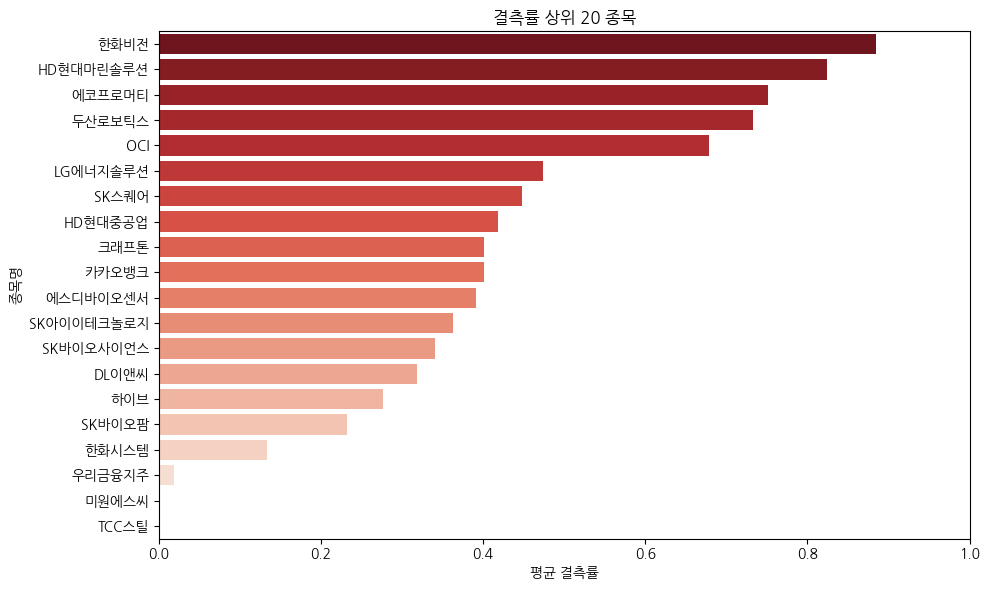

In [27]:
plot_top_missing_ratio(null_ratio)

In [28]:
import pandas as pd

def impute_factors(df):
    # 선형 보간 + 앞뒤 채우기
    df = df.interpolate(method="linear").ffill().bfill()

    # 공매도·융자 관련 팩터가 여전히 결측인 경우 0으로 대체
    df[["차입공매도비중", "융자잔고비중"]] = df[["차입공매도비중", "융자잔고비중"]].fillna(0)

    return df

# 전체 데이터에 적용
df_imputed = df_all_factors.groupby(["종목코드", "종목명"]).apply(impute_factors)

/tmp/ipython-input-28-267974477.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method="linear").ffill().bfill()
/tmp/ipython-input-28-267974477.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.interpolate(method="linear").ffill().bfill()
/tmp/ipython-input-28-267974477.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method="linear").ffill().bfill()
/tmp/ipython-input-28-267974477.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is de

In [31]:
# 종목별, 팩터별 결측률 계산
null_ratio_after = df_imputed.isnull().groupby(["종목코드", "종목명"]).mean()

# 평균 결측률 추가
null_ratio_after["평균결측률"] = null_ratio_after.mean(axis=1)

# 결측률 높은 종목 상위 확인
null_ratio_after.sort_values("평균결측률", ascending=False).head(10)

,,순매수비율,기관개인매수강도차,차입공매도비중,융자잔고비중,순매수거래비중,매수매도비율,평균결측률
종목코드,종목명,,,,,,,
A000080,하이트진로,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A000120,CJ대한통운,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A000240,한국앤컴퍼니,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A000270,기아,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A000660,SK하이닉스,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A000720,현대건설,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A000810,삼성화재,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A000880,한화,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A001040,CJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# 여전히 결측이 남아있는 종목 필터링
still_null = null_ratio_after[null_ratio_after["평균결측률"] > 0]
print(f"결측치가 남아 있는 종목 수: {len(still_null)}개")
still_null

결측치가 남아 있는 종목 수: 0개


,,순매수비율,기관개인매수강도차,차입공매도비중,융자잔고비중,순매수거래비중,매수매도비율,평균결측률
종목코드,종목명,,,,,,,


In [38]:
df_imputed

순매수비율  기관개인매수강도차  \
종목코드    종목명   종목코드    종목명   Symbol_SymbolName_ItemName                     
A000080 하이트진로 A000080 하이트진로 2019-01-01                    0.0   -38174.0   
                            2019-01-02                    0.0   -25107.0   
                            2019-01-03                    0.0    -9005.0   
                            2019-01-04                    0.0    32080.0   
                            2019-01-07                    0.0   -19945.0   
...                                                       ...        ...   
A489790 한화비전  A489790 한화비전  2025-06-23                    0.0  -351243.0   
                            2025-06-24                    0.0  -212597.0   
                            2025-06-25                    0.0  -210044.0   
                            2025-06-26                    0.0 -1514369.0   
                            2025-06-27                    0.0  -541446.0   

                                                         차입공매도비중    융자잔고비중  \
종목코드    종목명   종목코드    종목명   Symbol_SymbolName_ItemName                       
A000080 하이트진로 A000080 하이트진로 2019-01-01                  0.020643  1.193668   
                            2019-01-02                  0.084185  1.523784   
                            2019-01-03                  0.144032  2.274341   
                            2019-01-04                  0.133157  1.001416   
                            2019-01-07                  0.198792  2.513281   
...                                                          ...       ...   
A489790 한화비전  A489790 한화비전  2025-06-23                  0.065047  3.305718   
                            2025-06-24                  0.078020  3.761915   
                            2025-06-25                  0.130237  3.137262   
                            2025-06-26                  0.047974  0.692896   
                            2025-06-27                  0.103300  2.395421   

                                                         순매수거래비중  매수매도비율  
종목코드    종목명   종목코드    종목명   Symbol_SymbolName_ItemName                    
A000080 하이트진로 A000080 하이트진로 2019-01-01                  0.030401     1.0  
                            2019-01-02                 -0.045736     1.0  
                            2019-01-03                 -0.047111     1.0  
                            2019-01-04                 -0.232700     1.0  
                            2019-01-07                  0.086246     1.0  
...                                                          ...     ...  
A489790 한화비전  A489790 한화비전  2025-06-23                  0.169571     1.0  
                            2025-06-24                  0.047952     1.0  
                            2025-06-25                  0.045209     1.0  
                            2025-06-26                 -0.145089     1.0  
                            2025-06-27                  0.142451     1.0  

[286286 rows x 6 columns]

In [42]:
df_imputed.index.names

FrozenList(['종목코드', '종목명', '종목코드', '종목명', 'Symbol_SymbolName_ItemName'])

In [46]:
# 🔧 인덱스 이름 먼저 확인
print(df_imputed.index.names)

['종목코드', '종목명', '종목코드', '종목명', 'Symbol_SymbolName_ItemName']


In [47]:
# 1. 인덱스 이름 바꾸기 (중복 제거)
df_imputed.index.names = [None] * df_imputed.index.nlevels

In [48]:
# 2. 인덱스 초기화
df_fixed = df_imputed.reset_index()

In [50]:
df_fixed

,level_0,level_1,level_2,level_3,날짜,순매수비율,기관개인매수강도차,차입공매도비중,융자잔고비중,순매수거래비중,매수매도비율
0,A000080,하이트진로,A000080,하이트진로,2019-01-01,0.0,-38174.0,0.020643,1.193668,0.030401,1.0
1,A000080,하이트진로,A000080,하이트진로,2019-01-02,0.0,-25107.0,0.084185,1.523784,-0.045736,1.0
2,A000080,하이트진로,A000080,하이트진로,2019-01-03,0.0,-9005.0,0.144032,2.274341,-0.047111,1.0
3,A000080,하이트진로,A000080,하이트진로,2019-01-04,0.0,32080.0,0.133157,1.001416,-0.232700,1.0
4,A000080,하이트진로,A000080,하이트진로,2019-01-07,0.0,-19945.0,0.198792,2.513281,0.086246,1.0
...,...,...,...,...,...,...,...,...,...,...,...
286281,A489790,한화비전,A489790,한화비전,2025-06-23,0.0,-351243.0,0.065047,3.305718,0.169571,1.0
286282,A489790,한화비전,A489790,한화비전,2025-06-24,0.0,-212597.0,0.078020,3.761915,0.047952,1.0
286283,A489790,한화비전,A489790,한화비전,2025-06-25,0.0,-210044.0,0.130237,3.137262,0.045209,1.0
286284,A489790,한화비전,A489790,한화비전,2025-06-26,0.0,-1514369.0,0.047974,0.692896,-0.145089,1.0


In [51]:
# 3. 컬럼명 리네임 + 중복 제거
df_fixed = df_fixed.rename(columns={
    "level_0": "종목코드",
    "level_1": "종목명"
}).drop(columns=["level_2", "level_3"], errors="ignore")

In [52]:
# 4. 날짜 컬럼 이름 정리
for col in df_fixed.columns:
    if pd.api.types.is_datetime64_any_dtype(df_fixed[col]):
        df_fixed = df_fixed.rename(columns={col: "날짜"})
        break

In [53]:
# 5. 멀티인덱스 구성
df_fixed = df_fixed.set_index(["종목코드", "종목명", "날짜"]).sort_index()

In [54]:
df_fixed

순매수비율  기관개인매수강도차   차입공매도비중    융자잔고비중   순매수거래비중  \
종목코드    종목명   날짜                                                           
A000080 하이트진로 2019-01-01    0.0   -38174.0  0.020643  1.193668  0.030401   
              2019-01-02    0.0   -25107.0  0.084185  1.523784 -0.045736   
              2019-01-03    0.0    -9005.0  0.144032  2.274341 -0.047111   
              2019-01-04    0.0    32080.0  0.133157  1.001416 -0.232700   
              2019-01-07    0.0   -19945.0  0.198792  2.513281  0.086246   
...                         ...        ...       ...       ...       ...   
A489790 한화비전  2025-06-23    0.0  -351243.0  0.065047  3.305718  0.169571   
              2025-06-24    0.0  -212597.0  0.078020  3.761915  0.047952   
              2025-06-25    0.0  -210044.0  0.130237  3.137262  0.045209   
              2025-06-26    0.0 -1514369.0  0.047974  0.692896 -0.145089   
              2025-06-27    0.0  -541446.0  0.103300  2.395421  0.142451   

                          매수매도비율  
종목코드    종목명   날짜                  
A000080 하이트진로 2019-01-01     1.0  
              2019-01-02     1.0  
              2019-01-03     1.0  
              2019-01-04     1.0  
              2019-01-07     1.0  
...                          ...  
A489790 한화비전  2025-06-23     1.0  
              2025-06-24     1.0  
              2025-06-25     1.0  
              2025-06-26     1.0  
              2025-06-27     1.0  

[286286 rows x 6 columns]

In [55]:
# melt → wide 변환
df_flat = df_fixed.reset_index().melt(
    id_vars=["종목코드", "종목명", "날짜"],
    var_name="팩터명",
    value_name="값"
)

df_flat["컬럼명"] = (
    df_flat["종목코드"] + "_" +
    df_flat["종목명"] + "_" +
    df_flat["팩터명"]
)

df_final = df_flat.pivot(index="날짜", columns="컬럼명", values="값")
df_final.index.name = "date"
df_final = df_final.sort_index()

In [56]:
df_final

컬럼명,A000080_하이트진로_기관개인매수강도차,A000080_하이트진로_매수매도비율,A000080_하이트진로_순매수거래비중,A000080_하이트진로_순매수비율,A000080_하이트진로_융자잔고비중,A000080_하이트진로_차입공매도비중,A000120_CJ대한통운_기관개인매수강도차,A000120_CJ대한통운_매수매도비율,A000120_CJ대한통운_순매수거래비중,A000120_CJ대한통운_순매수비율,...,A456040_OCI_순매수거래비중,A456040_OCI_순매수비율,A456040_OCI_융자잔고비중,A456040_OCI_차입공매도비중,A489790_한화비전_기관개인매수강도차,A489790_한화비전_매수매도비율,A489790_한화비전_순매수거래비중,A489790_한화비전_순매수비율,A489790_한화비전_융자잔고비중,A489790_한화비전_차입공매도비중
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-38174.0,1.0,0.030401,0.0,1.193668,0.020643,3478.0,1.0,0.154646,0.0,...,0.112252,0.0,0.261286,0.000071,-13663273.0,1.0,0.128879,0.0,0.022950,0.003782
2019-01-02,-25107.0,1.0,-0.045736,0.0,1.523784,0.084185,6124.0,1.0,-0.022788,0.0,...,0.112252,0.0,0.261286,0.000071,-13663273.0,1.0,0.128879,0.0,0.022950,0.003782
2019-01-03,-9005.0,1.0,-0.047111,0.0,2.274341,0.144032,2942.0,1.0,0.079430,0.0,...,0.112252,0.0,0.261286,0.000071,-13663273.0,1.0,0.128879,0.0,0.022950,0.003782
2019-01-04,32080.0,1.0,-0.232700,0.0,1.001416,0.133157,3610.0,1.0,-0.027121,0.0,...,0.112252,0.0,0.261286,0.000071,-13663273.0,1.0,0.128879,0.0,0.022950,0.003782
2019-01-07,-19945.0,1.0,0.086246,0.0,2.513281,0.198792,-5203.0,1.0,0.050494,0.0,...,0.112252,0.0,0.261286,0.000071,-13663273.0,1.0,0.128879,0.0,0.022950,0.003782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,-88785.0,1.0,0.470721,0.0,6.382677,0.102907,-41030.0,1.0,0.423252,0.0,...,0.317740,0.0,3.188259,0.047690,-351243.0,1.0,0.169571,0.0,3.305718,0.065047
2025-06-24,-79391.0,1.0,-0.232096,0.0,3.023433,0.076342,-12624.0,1.0,0.119336,0.0,...,-0.230126,0.0,2.246992,0.012743,-212597.0,1.0,0.047952,0.0,3.761915,0.078020
2025-06-25,-88368.0,1.0,0.159254,0.0,4.393521,0.108193,-13878.0,1.0,0.193251,0.0,...,0.255350,0.0,2.189649,0.056029,-210044.0,1.0,0.045209,0.0,3.137262,0.130237


In [57]:
# 파일로 저장 (멀티 인덱스 포함)
df_final.to_csv("volume_factor.csv", encoding="utf-8-sig")

Fundamental 자료 가공

In [35]:
import pandas as pd

# 1. raw 데이터 불러오기
raw_fund = pd.read_excel("fundamental.xlsx", header=None)  # 파일 경로 맞춰줘

# 2. 3행 헤더 전치 + 컬럼명 만들기
header_rows = raw_fund.iloc[0:3].T
header_rows = header_rows.fillna(method="ffill")

# 3. 컬럼명 결합 (Symbol_SymbolName_ItemName)
fund_columns = (
    header_rows[0].astype(str).str.strip() + "_" +
    header_rows[1].astype(str).str.strip() + "_" +
    header_rows[2].astype(str).str.strip()
)

# 4. 컬럼명 정제 (공백 제거, 괄호는 유지)
fund_columns = fund_columns.str.replace(" ", "")
fund_columns = fund_columns.str.replace("（", "(").str.replace("）", ")")

# 5. 데이터 본문 추출
df_fund = raw_fund.iloc[3:].copy()
df_fund.columns = fund_columns.values

# 6. 인덱스 설정 (첫 번째 열이 날짜)
df_fund.index = pd.to_datetime(df_fund.iloc[:, 0])
df_fund = df_fund.drop(df_fund.columns[0], axis=1)

/tmp/ipython-input-35-1387458498.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  header_rows = header_rows.fillna(method="ffill")


In [37]:
df_fund.to_csv('fundamental_revision.csv')

병합
- 결측치 ffill 방식
- wide-form 팩터
> 병합 대상 파일
    - volume_factor.csv
    - fundamental_revision.csv
    - technical_indicators_kospi200.csv



In [58]:
import pandas as pd

# 1. 파일 불러오기
df_volume = pd.read_csv("volume_factor.csv", index_col=0, parse_dates=True)
df_fundamental = pd.read_csv("fundamental_revision.csv", index_col=0, parse_dates=True)
df_technical = pd.read_csv("technical_indicators_kospi200.csv", index_col=0, parse_dates=True)

# 2. 날짜 기준으로 병합
df_merged = pd.concat([df_volume, df_fundamental, df_technical], axis=1)

# 3. 날짜 기준 정렬 및 결측 보간 (ffill → bfill)
df_merged = df_merged.sort_index()
df_merged = df_merged.ffill().bfill()

/tmp/ipython-input-58-2594039343.py:5: DtypeWarning: Columns (691,1065,1066,1635,1636,1911,1916) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fundamental = pd.read_csv("fundamental_revision.csv", index_col=0, parse_dates=True)


In [59]:
df_merged

,A000080_하이트진로_기관개인매수강도차,A000080_하이트진로_매수매도비율,A000080_하이트진로_순매수거래비중,A000080_하이트진로_순매수비율,A000080_하이트진로_융자잔고비중,A000080_하이트진로_차입공매도비중,A000120_CJ대한통운_기관개인매수강도차,A000120_CJ대한통운_매수매도비율,A000120_CJ대한통운_순매수거래비중,A000120_CJ대한통운_순매수비율,...,A002710_disparity_10d,A002710_disparity_20d,A002710_disparity_60d,A002710_macd,A002710_rsi,A002710_willr,A002710_hist_vol,A002710_garch_vol,A002710_volume_ma_ratio,A002710_volume_spike_ratio
2019-01-01,-38174.0,1.0,0.030401,0.0,1.193668,0.020643,3478.0,1.0,0.154646,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.431390,-0.000000,0.230596,NaN,1.074803,0.298543
2019-01-02,-25107.0,1.0,-0.045736,0.0,1.523784,0.084185,6124.0,1.0,-0.022788,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.431390,-0.000000,0.230596,NaN,1.074803,0.298543
2019-01-03,-9005.0,1.0,-0.047111,0.0,2.274341,0.144032,2942.0,1.0,0.079430,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.431390,-0.000000,0.230596,NaN,1.074803,0.298543
2019-01-04,32080.0,1.0,-0.232700,0.0,1.001416,0.133157,3610.0,1.0,-0.027121,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.431390,-0.000000,0.230596,NaN,1.074803,0.298543
2019-01-07,-19945.0,1.0,0.086246,0.0,2.513281,0.198792,-5203.0,1.0,0.050494,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.431390,-0.000000,0.230596,NaN,1.074803,0.298543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,-88785.0,1.0,0.470721,0.0,6.382677,0.102907,-41030.0,1.0,0.423252,0.0,...,0.020004,0.033507,0.133738,0.716003,63.336792,-20.454545,0.395665,NaN,0.474898,0.879301
2025-06-24,-79391.0,1.0,-0.232096,0.0,3.023433,0.076342,-12624.0,1.0,0.119336,0.0,...,0.020004,0.033507,0.133738,0.716003,63.336792,-20.454545,0.395665,NaN,0.474898,0.879301
2025-06-25,-88368.0,1.0,0.159254,0.0,4.393521,0.108193,-13878.0,1.0,0.193251,0.0,...,0.020004,0.033507,0.133738,0.716003,63.336792,-20.454545,0.395665,NaN,0.474898,0.879301
2025-06-26,-155817.0,1.0,0.240856,0.0,2.883156,0.102575,-30461.0,1.0,0.277594,0.0,...,0.020004,0.033507,0.133738,0.716003,63.336792,-20.454545,0.395665,NaN,0.474898,0.879301


In [60]:
print(df_merged.shape)
print(df_merged.isnull().sum().sum())  # 전체 결측치 수 확인
df_merged.head()

(1694, 6014)
1483944


,A000080_하이트진로_기관개인매수강도차,A000080_하이트진로_매수매도비율,A000080_하이트진로_순매수거래비중,A000080_하이트진로_순매수비율,A000080_하이트진로_융자잔고비중,A000080_하이트진로_차입공매도비중,A000120_CJ대한통운_기관개인매수강도차,A000120_CJ대한통운_매수매도비율,A000120_CJ대한통운_순매수거래비중,A000120_CJ대한통운_순매수비율,...,A002710_disparity_10d,A002710_disparity_20d,A002710_disparity_60d,A002710_macd,A002710_rsi,A002710_willr,A002710_hist_vol,A002710_garch_vol,A002710_volume_ma_ratio,A002710_volume_spike_ratio
2019-01-01,-38174.0,1.0,0.030401,0.0,1.193668,0.020643,3478.0,1.0,0.154646,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.43139,-0.0,0.230596,NaN,1.074803,0.298543
2019-01-02,-25107.0,1.0,-0.045736,0.0,1.523784,0.084185,6124.0,1.0,-0.022788,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.43139,-0.0,0.230596,NaN,1.074803,0.298543
2019-01-03,-9005.0,1.0,-0.047111,0.0,2.274341,0.144032,2942.0,1.0,0.079430,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.43139,-0.0,0.230596,NaN,1.074803,0.298543
2019-01-04,32080.0,1.0,-0.232700,0.0,1.001416,0.133157,3610.0,1.0,-0.027121,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.43139,-0.0,0.230596,NaN,1.074803,0.298543
2019-01-07,-19945.0,1.0,0.086246,0.0,2.513281,0.198792,-5203.0,1.0,0.050494,0.0,...,0.000764,0.085214,0.092601,-0.951764,74.43139,-0.0,0.230596,NaN,1.074803,0.298543


In [62]:
df_merged_filtered = df_merged.ffill().bfill()

In [63]:
print(df_merged_filtered.shape)
print("남은 결측치 수:", df_merged_filtered.isnull().sum().sum())

(1694, 6014)
남은 결측치 수: 1483944


In [70]:
# 1. 기본 ffill + bfill로 연속 지표 보간
df_filled = df_merged.ffill().bfill()

# 2. 공매도/융자 등 일부 팩터는 0으로 대체 (컬럼명 기반으로 조건 적용)
cols_fill_zero = [col for col in df_filled.columns if any(keyword in col for keyword in [
    "차입공매도", "융자잔고", "순매수수량", "수급", "기관개인", "순매수거래비중"
])]

# 3. 해당 컬럼에 대해 0으로 채우기
df_filled[cols_fill_zero] = df_filled[cols_fill_zero].fillna(0)

# 4. 남은 결측치 최종 확인
print("남은 결측치 수:", df_filled.isnull().sum().sum())

남은 결측치 수: 1483944


공매도/융자/수급 팩터: fillna(0)

In [71]:
fill_zero_keywords = ["차입공매도", "융자잔고", "순매수수량", "순매수비율", "기관개인", "수급", "매수매도비율"]

cols_fill_zero = [col for col in df_merged.columns if any(k in col for k in fill_zero_keywords)]

df_merged[cols_fill_zero] = df_merged[cols_fill_zero].fillna(0)

기술 지표 (RSI, MACD, GARCH 등): ffill + bfill

In [72]:
fill_ffill_keywords = ["ret_", "rsi", "macd", "hist_vol", "garch", "volume_ma", "disparity"]

cols_fill_ffill = [col for col in df_merged.columns if any(k in col.lower() for k in fill_ffill_keywords)]

df_merged[cols_fill_ffill] = df_merged[cols_fill_ffill].ffill().bfill()

펀더멘털 팩터: ffill만 (quarterly 고정이라 backward는 위험)

In [73]:
fill_fundamental_keywords = ["ROE", "ROA", "PER", "PBR", "부채비율", "이익률", "증가율", "현금흐름"]

cols_fill_fund = [col for col in df_merged.columns if any(k in col for k in fill_fundamental_keywords)]

df_merged[cols_fill_fund] = df_merged[cols_fill_fund].ffill()

In [74]:
# 아직 결측이 남은 컬럼 확인
still_null_cols = df_merged.columns[df_merged.isnull().any()].tolist()

df_merged[still_null_cols] = df_merged[still_null_cols].interpolate(limit_direction="both")
df_merged[still_null_cols] = df_merged[still_null_cols].ffill().bfill()

In [75]:
print("최종 남은 결측치 수:", df_merged.isnull().sum().sum())

최종 남은 결측치 수: 1483944


/tmp/ipython-input-76-713217749.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


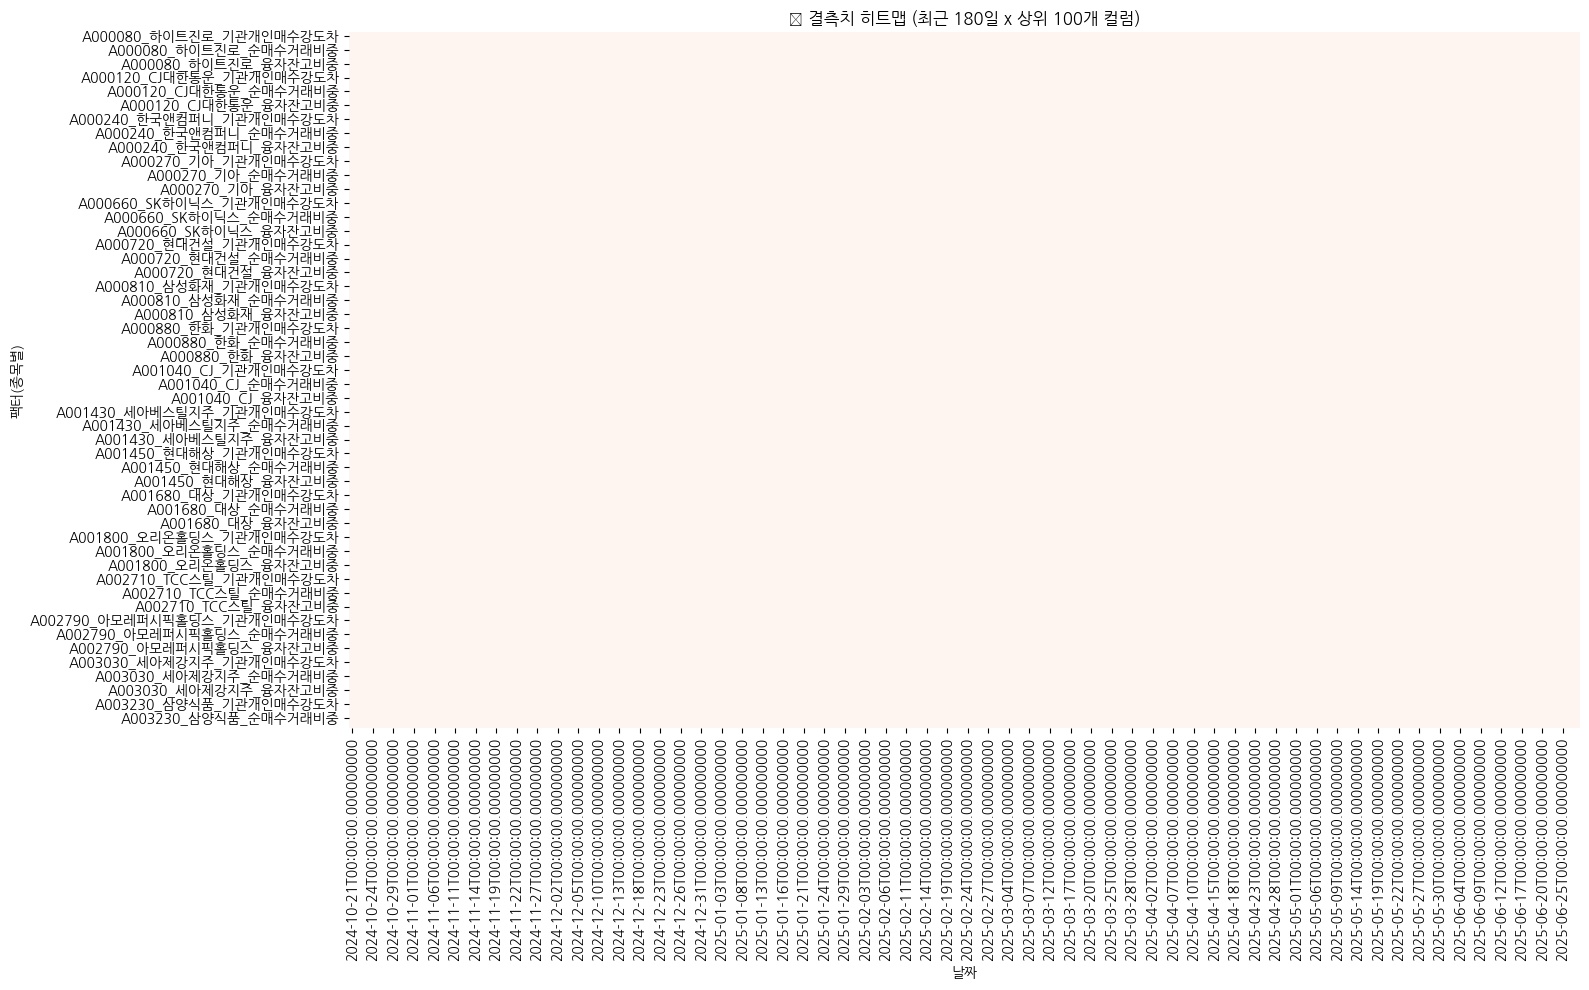

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 결측 여부를 0/1로 변환
null_mask = df_merged.isnull().astype(int)

# 2. 샘플 줄이기 (날짜: 최근 180일, 컬럼: 앞 100개만)
subset = null_mask.iloc[-180:, :100]  # 원하는 만큼 조절 가능

# 3. 히트맵 출력
plt.figure(figsize=(16, 10))
sns.heatmap(subset.T, cmap="Reds", cbar=False)
plt.title("📉 결측치 히트맵 (최근 180일 x 상위 100개 컬럼)")
plt.xlabel("날짜")
plt.ylabel("팩터(종목별)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-77-819571142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=null_ratio.head(30).index, x=null_ratio.head(30).values, palette="Reds_r")


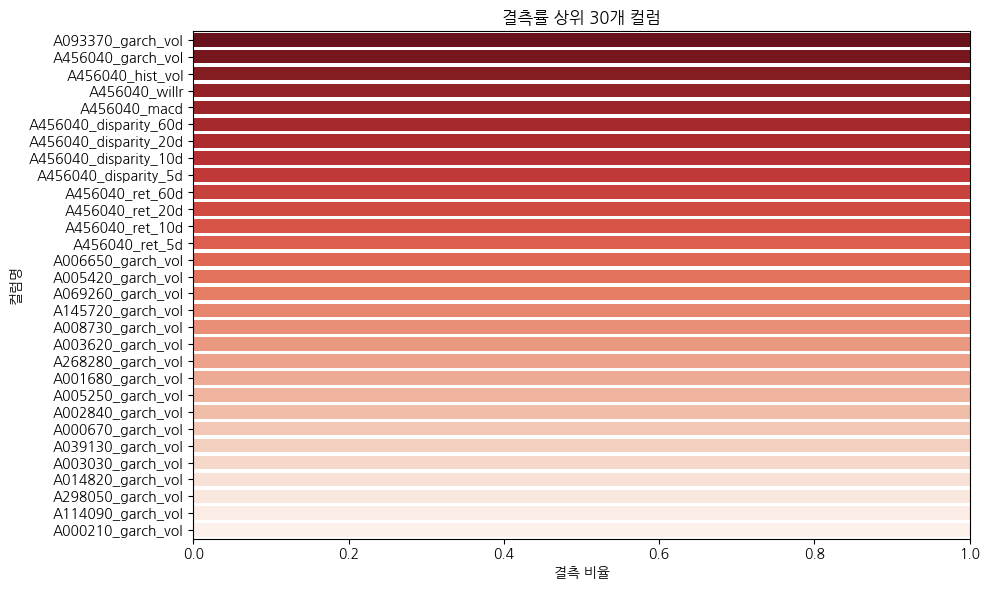

In [77]:
null_ratio = df_merged.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=null_ratio.head(30).index, x=null_ratio.head(30).values, palette="Reds_r")
plt.title("결측률 상위 30개 컬럼")
plt.xlabel("결측 비율")
plt.ylabel("컬럼명")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

/tmp/ipython-input-78-2792183045.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=code_null_ratio.head(30).index, x=code_null_ratio.head(30).values, palette="Reds_r")


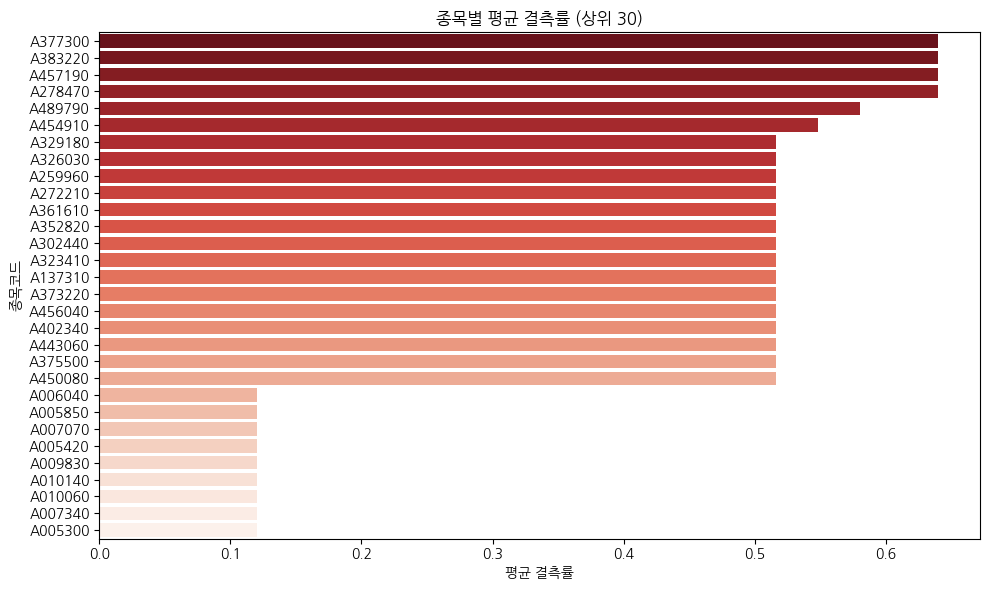

In [78]:
# 종목코드 기준 결측률 집계
import re

def extract_code(colname):
    m = re.match(r"(A\d{6})", colname)
    return m.group(1) if m else None

code_map = df_merged.columns.map(extract_code)
code_null_ratio = df_merged.isnull().mean().groupby(code_map).mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(y=code_null_ratio.head(30).index, x=code_null_ratio.head(30).values, palette="Reds_r")
plt.title("종목별 평균 결측률 (상위 30)")
plt.xlabel("평균 결측률")
plt.ylabel("종목코드")
plt.tight_layout()
plt.show()

In [79]:
# GARCH 관련 컬럼 확인
garch_cols = [col for col in df_merged.columns if 'garch_vol' in col]

# GARCH 중 결측률 높은 것만 제거 (예: 90% 이상)
null_ratio = df_merged[garch_cols].isnull().mean()
drop_cols = null_ratio[null_ratio > 0.9].index.tolist()

# 제거
df_merged = df_merged.drop(columns=drop_cols)

In [80]:
df_merged = df_merged.ffill().bfill()
print("최종 결측치 수:", df_merged.isnull().sum().sum())

최종 결측치 수: 1145144


In [81]:
null_ratio = df_merged.isnull().mean()
drop_cols_50 = null_ratio[null_ratio > 0.5].index.tolist()

print(f"결측률 50% 이상 컬럼 수: {len(drop_cols_50)}")
df_merged = df_merged.drop(columns=drop_cols_50)

결측률 50% 이상 컬럼 수: 676


In [82]:
import re

def extract_code(col):
    m = re.match(r"(A\d{6})", col)
    return m.group(1) if m else None

# 종목코드 추출 후 평균 결측률
code_map = df_merged.columns.map(extract_code)
code_null_ratio = df_merged.isnull().mean().groupby(code_map).mean()

# 종목 중 평균 결측률 0.5 초과 종목 제거
drop_codes = code_null_ratio[code_null_ratio > 0.5].index.tolist()
drop_cols_code = [col for col in df_merged.columns if any(code in col for code in drop_codes)]

print(f"평균 결측률 높은 종목 제거 수: {len(drop_cols_code)}")
df_merged = df_merged.drop(columns=drop_cols_code)

평균 결측률 높은 종목 제거 수: 0


In [83]:
df_merged = df_merged.interpolate(limit_direction='both').ffill().bfill()
print("최종 결측치 수:", df_merged.isnull().sum().sum())

/tmp/ipython-input-83-2830165968.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_merged = df_merged.interpolate(limit_direction='both').ffill().bfill()


최종 결측치 수: 0


In [85]:
import pandas as pd

# 최종 결측률 계산
null_ratio = df_merged.isnull().mean()

# 1. 컬럼 기준 결측률 50% 이상인 컬럼 제거
drop_cols_50 = null_ratio[null_ratio > 0.5].index.tolist()
df_reduced = df_merged.drop(columns=drop_cols_50)

# 2. 종목 코드 추출 함수
import re
def extract_code(col):
    m = re.match(r"(A\d{6})", col)
    return m.group(1) if m else None

# 종목 코드 기준 평균 결측률 계산
code_map = df_reduced.columns.map(extract_code)
code_null_ratio = df_reduced.isnull().mean().groupby(code_map).mean()

# 3. 평균 결측률 50% 초과 종목 제거
drop_codes = code_null_ratio[code_null_ratio > 0.5].index.tolist()
drop_cols_code = [col for col in df_reduced.columns if any(code in col for code in drop_codes)]

# 제거
df_final = df_reduced.drop(columns=drop_cols_code)

# 4. 최종 보간 처리 (interpolate + ffill + bfill)
df_final = df_final.interpolate(limit_direction='both').ffill().bfill()

# 5. 결측치 수 확인
final_null_count = df_final.isnull().sum().sum()

final_null_count

np.int64(0)

In [87]:
df_final.to_csv('merged.csv')